# Loading Data:

In [56]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 

In [57]:
df = pd.read_csv('Customer_Behaviour.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [58]:
df.shape

(400, 5)

In [59]:
# Dropping the Unnecessary columns:
df=df.drop(columns=['User ID'],axis=1)

In [60]:
# Updated dataset:
df.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [61]:
# Checking for the duplicate values:
df.duplicated().sum()

20

In [62]:
# checking for null values:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [63]:
# Converting the string values in Gender column to Categorical values (0,1)
Gender=pd.get_dummies(df.Gender,drop_first=True)
Gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [64]:
# adding the Male column to the dataset:
df=pd.concat([df,Gender],axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [65]:
# droppping the gender column which had the string values:
df.drop('Gender',axis=1,inplace=True)

In [66]:
# updated dataset:
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


# Data Visualization:

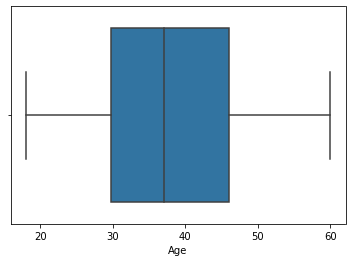

In [67]:
# Boxplot for Age to know where the majority of the values lie:
sns.boxplot(df.Age)
plt.show()

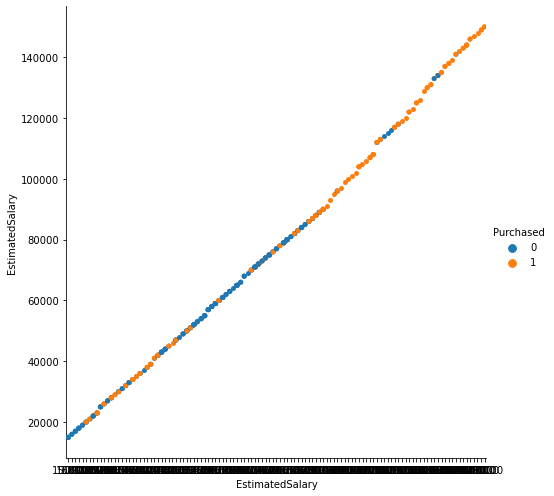

In [68]:
sns.catplot(x='EstimatedSalary',y='EstimatedSalary',hue='Purchased',height=7,data=df)

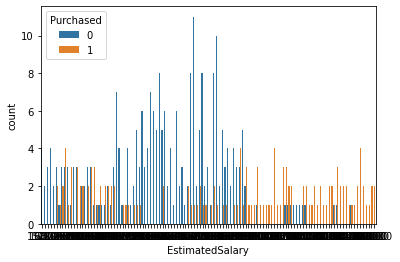

In [27]:
sns.countplot(x='EstimatedSalary',hue='Purchased',data=df)

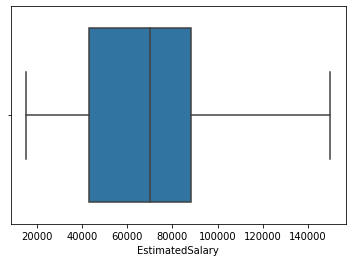

In [12]:
sns.boxplot(df['EstimatedSalary'])
plt.show()

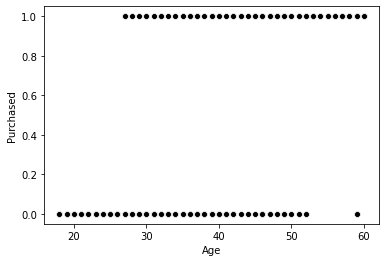

In [7]:
# scatterplot using seaborn
sns.scatterplot(df.Age,df['Purchased'],color='black')
plt.show()

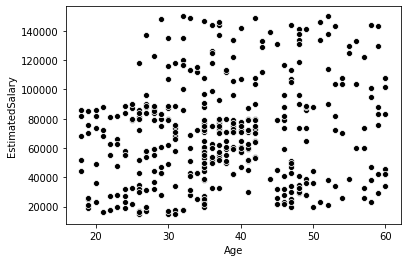

In [23]:
# scatterplot using seaborn
sns.scatterplot(df.Age,df['EstimatedSalary'],color='black')
plt.show()

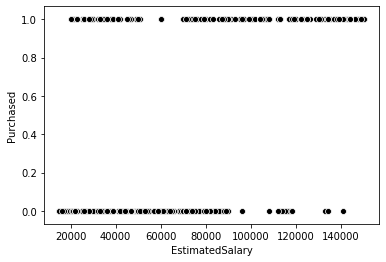

In [24]:
# scatterplot using seaborn
sns.scatterplot(df.EstimatedSalary,df['Purchased'],color='black')
plt.show()

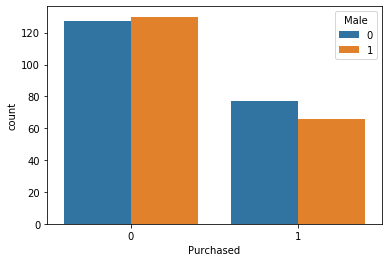

In [25]:
sns.countplot(x='Purchased',hue='Male',data=df)
plt.show()

In [69]:
X = df.iloc[:,[0,1,3]]
X

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [70]:
y = df.iloc[:,2]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

# Splitting the dataset into Train and test subsets

In [86]:
import math
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

# Transforming the dataset (Preproccesing)

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
regressor = LogisticRegression(random_state = 0)

regressor.fit(X_train,y_train)

y_predicted = regressor.predict(X_test)

# Accurcy and error metrics:

In [105]:
from sklearn.metrics import accuracy_score,mean_squared_error
print('the accuracy is',accuracy_score(y_test,y_predicted)*100)
print('the mean squared error (MSE) is',mean_squared_error(y_test,y_predicted))
print('the root mean squared error (RMSE) is',math.sqrt(mean_squared_error(y_test,y_predicted)))

the accuracy is 91.25
the mean squared error (MSE) is 0.0875
the root mean squared error (RMSE) is 0.2958039891549808


In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)

array([[56,  2],
       [ 5, 17]], dtype=int64)